<a href="https://colab.research.google.com/github/Patricia7sp/Desafios-DataScience/blob/main/desafio_3_predicao_renda_LabelEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align: center;">


<font size='5'><strong> DESAFIO 3 - Predição da Renda </strong></font>
</p>

<font size='3'>
<strong>Tema</strong>: Prever se determinado adulto possui uma renda superior ou inferior a USD50k (modelo classificatório binário)<p>
    
<br>   
 "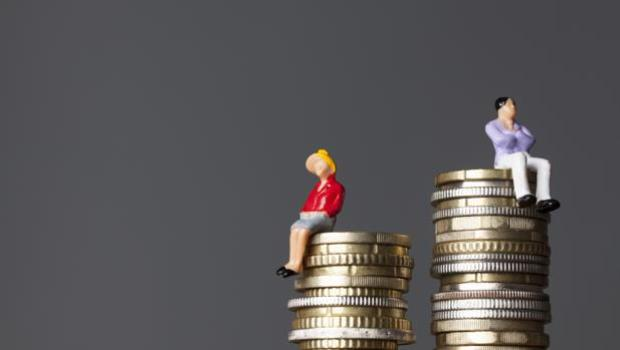" 

<br>

### Aplicando o método  label Encoder

*  objetivo de facilitar o armazenamento de texto na máquina, ou seja, transforma dados categóricos  em numéricos e ecomiza espaço de armazenamento na máquina

In [ ]:
conda install imblearn

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - imblearn

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




### Importando as bibliotecas importantes

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import matplotlib.image as mpim
import scipy.stats as st
from scipy import stats
from statsmodels.formula.api  import ols
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
# Essa biblioteca mistura os dados e garante que todos tenham informação
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing 
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


 ### Fazendo a leitura do Dataset

In [3]:
renda = pd.read_csv('adult.csv', delimiter=',')
renda.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Analisando os dados

In [4]:
print(renda.shape)
display(renda.info(),renda.describe().T)

(48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [ ]:
# 
def normal(df, col, threshold=0.05):
    try:
        zscore, p_value = stats.normaltest(df[col])
        if p_value < threshold:
            result = 'not_normal'
        else:
            result = 'normal'
    except:
        zscore = p_value = np.nan
        result = 'not_applicable'
    return result

def outliers_count_IQR(df, col):
    try:
        if len(df[col].unique())>2: # if para eliminar features binárias
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr_range = q3 - q1
            lower = q1 - 1.5*iqr_range
            upper = q3 + 1.5*iqr_range
            out_low = df[df[col] < lower].count()[0]
            out_up = df[df[col] > upper].count()[0]
            outliers = out_low + out_up
            outliers_perc = round(outliers / df.shape[0],2)
        else:
            outliers = np.nan
            outliers_perc = np.nan
    except:
        outliers = np.nan
        outliers_perc = np.nan
    return outliers, outliers_perc

def EDA_morestats(df):
    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    

 
    colunas = df.columns.tolist()
    
        
    eda_df['Amount_Unique'] = pd.Series(map(lambda x: len(df[x].unique().tolist()), colunas), index=colunas)
    
    eda_df['Mean'] = df.mean().round(3)
    eda_df['Min'] = df.min()
    eda_df['Max'] = df.max()
    eda_df['STD'] = df.std().round(3)
    eda_df['Normality'] = pd.Series(map(lambda x: normal(df, x), colunas), index=colunas)
    eda_df['Amount_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[0], colunas), index=colunas)
    eda_df['%_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[1], colunas), index=colunas)
    df = pd.DataFrame(eda_df)
    return df.loc[colunas,:]

In [ ]:
EDA_morestats(renda)

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Mean,Min,Max,STD,Normality,Amount_Outliers,%_Outliers
age,0,0.0,int64,48842,74,38.644,17,90,13.711,not_normal,216.0,0.00
workclass,0,0.0,object,48842,9,NaN,?,Without-pay,NaN,not_applicable,NaN,NaN
fnlwgt,0,0.0,int64,48842,28523,189664.135,12285,1490400,105604.025,not_normal,1453.0,0.03
education,0,0.0,object,48842,16,NaN,10th,Some-college,NaN,not_applicable,NaN,NaN
educational-num,0,0.0,int64,48842,16,10.078,1,16,2.571,not_normal,1794.0,0.04
marital-status,0,0.0,object,48842,7,NaN,Divorced,Widowed,NaN,not_applicable,NaN,NaN
occupation,0,0.0,object,48842,15,NaN,?,Transport-moving,NaN,not_applicable,NaN,NaN
relationship,0,0.0,object,48842,6,NaN,Husband,Wife,NaN,not_applicable,NaN,NaN
race,0,0.0,object,48842,5,NaN,Amer-Indian-Eskimo,White,NaN,not_applicable,NaN,NaN
gender,0,0.0,object,48842,2,NaN,Female,Male,NaN,not_applicable,NaN,NaN


### Transformando a coluna income em binaria 

 *  menor ou igual 50K = 0
 *  maior 50k = 1

In [5]:
renda.income = renda.income.replace('<=50K', 0 )
renda.income = renda.income.replace('>50K', 1 )


In [6]:
renda.income.value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [7]:
print('Renda menor ou igual a 50K=') 
round(37155/48842*100,2) 

Renda menor ou igual a 50K=


76.07

In [ ]:
print('Renda maior que 50K=') 
round(11687/48842*100,2)


Renda maior que 50K=


23.93

In [ ]:
renda[['workclass', 'gender', 'income']].groupby(['workclass', 'income']).count()

gender
workclass        income        
?                0         2534
                 1          265
Federal-gov      0          871
                 1          561
Local-gov        0         2209
                 1          927
Never-worked     0           10
Private          0        26519
                 1         7387
Self-emp-inc     0          757
                 1          938
Self-emp-not-inc 0         2785
                 1         1077
State-gov        0         1451
                 1          530
Without-pay      0           19
                 1            2

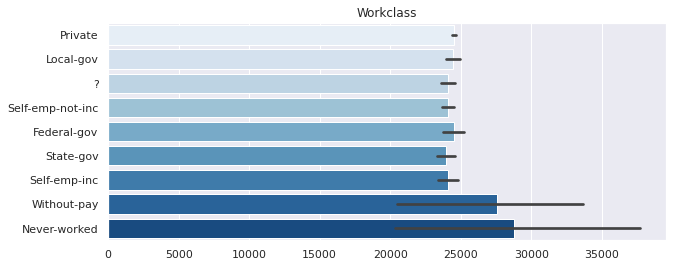

In [ ]:
plt.figure(figsize=(10,4))
plt.title('Workclass')
sns.barplot(x=renda['workclass'].index, y=renda['workclass'].values, palette='Blues');

In [ ]:
native= renda[['gender', 'income', 'fnlwgt']].groupby(['gender', 'income']).count()
native

fnlwgt
gender income        
Female 0        14423
       1         1769
Male   0        22732
       1         9918

In [ ]:
renda[['native-country']].value_counts()

native-country            
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
P

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 100]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 100, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 100)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 2.0, w_pad = 2.0, h_pad = 2.0)
    plt.show()



C:\Users\Qintess\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Qintess\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Qintess\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Qintess\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element pos

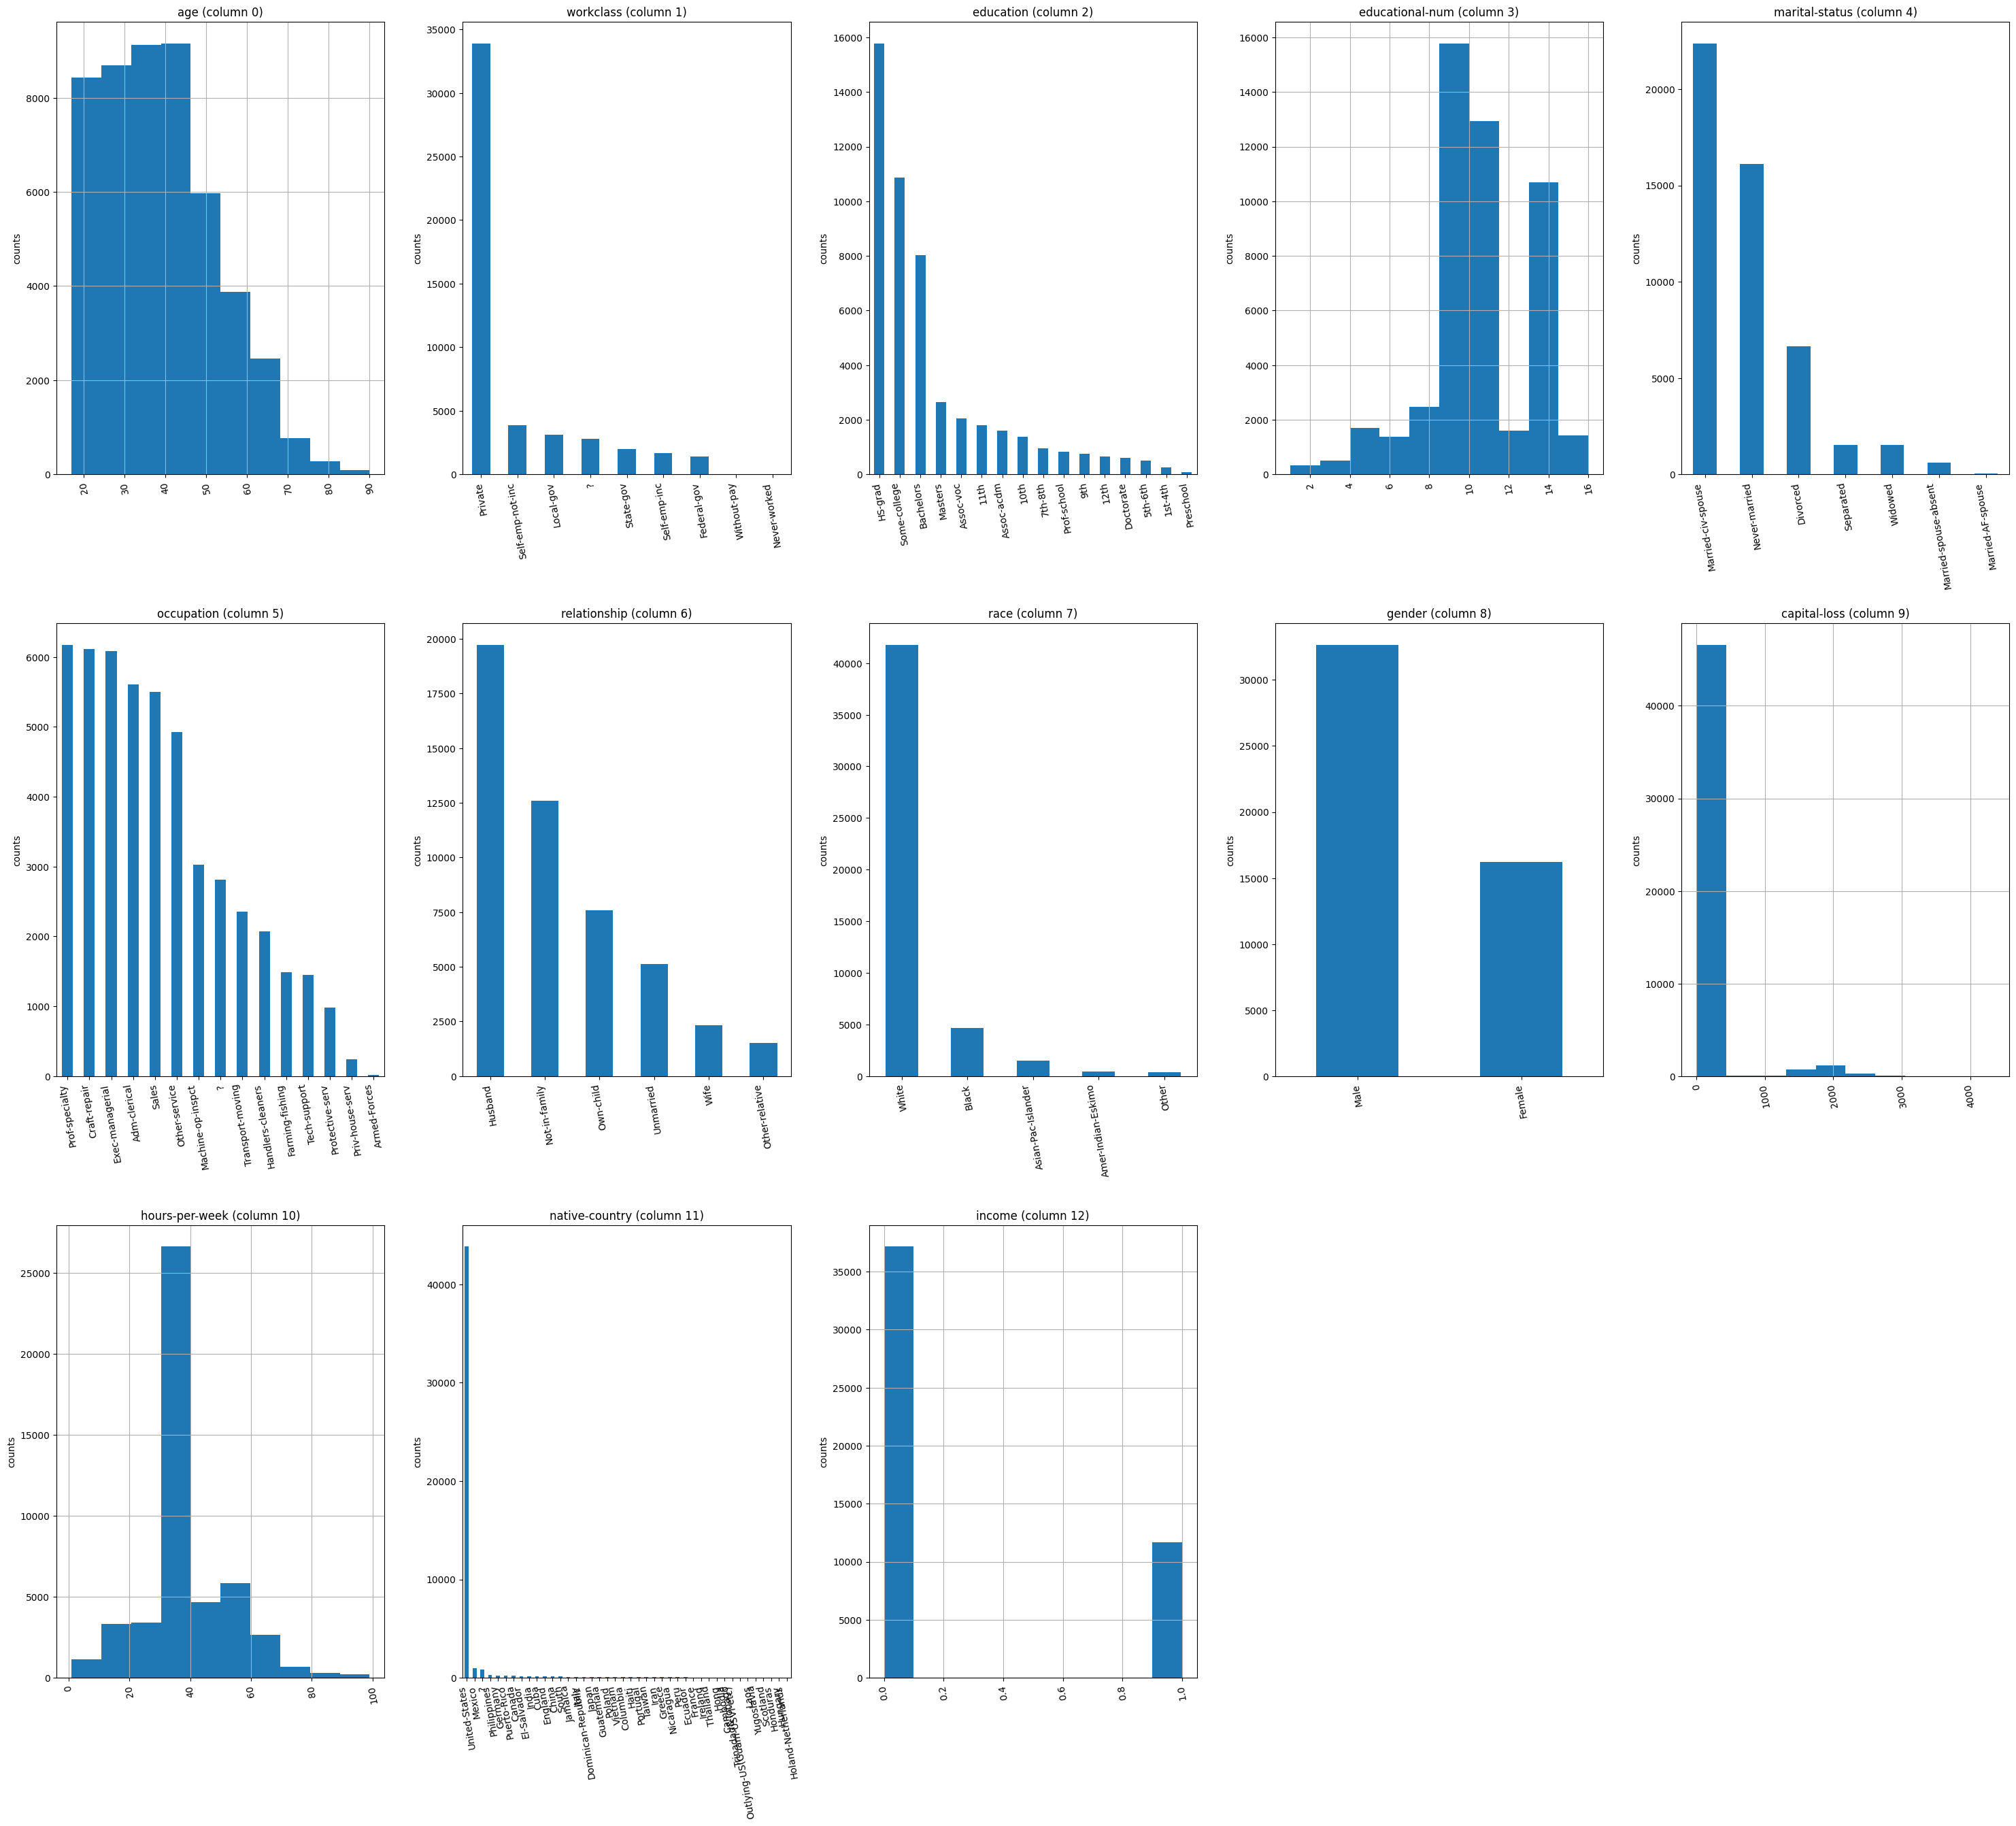

In [ ]:
plotPerColumnDistribution(renda,25, 5)


### Aplicando encoding nas features  


In [8]:
# importando a biblioteca encoder
from sklearn.preprocessing import LabelEncoder


In [10]:
renda = renda.apply(LabelEncoder().fit_transform)
renda.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,4,19329,1,6,4,7,3,2,1,0,0,39,39,0
1,21,4,4212,11,8,2,5,0,4,1,0,0,49,39,0
2,11,2,25340,7,11,2,11,0,4,1,0,0,39,39,1
3,27,4,11201,15,9,2,7,0,2,1,98,0,39,39,1
4,1,0,5411,15,9,4,0,3,4,0,0,0,29,39,0


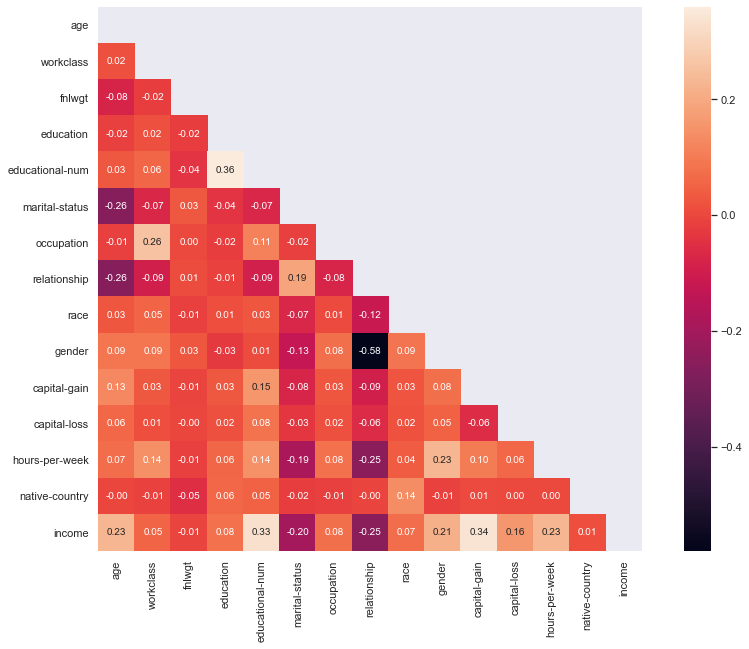

In [ ]:
# Plotando um mapa de calor das correlações com todas as variáveis
renda_corr = renda.corr()
sns.set(font_scale=1.0)
f, ax = plt.subplots(figsize=(15, 10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(renda_corr, dtype=bool))
hm = sns.heatmap(renda_corr, 
                 mask=mask,
                 cbar=True, # formatando a barra lateral de cores para o heatmap
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=renda_corr.columns, 
                 xticklabels=renda_corr.columns)



 As Features tem uma correlação bem baixa, podemos assim concluir que são independentes 

 ### Separando as Features preditoras e a variável alvo

In [11]:
y = renda['income']
x = renda.drop( ['income','education', 'fnlwgt'], axis=1)



In [ ]:
x.shape


(48842, 12)

In [12]:
# 0 = <=50k
# 1 = >50k
y.value_counts()

0    37155
1    11687
Name: income, dtype: int64

### Normalizando os Dados com  StandardScaler
  * Essa técnica na prática ignora a forma da distribuição e transforma o dado para forma com média próxima de zero e um desvio padrão próximo a um, ou seja, assume que não temos valores discrepantes nos dados e normaliza tudo!

In [14]:
#fit() calcula a média e o desvio padrão da distribuição e já “sabe” como irá fazer para padronizar meus dados
normalizar = preprocessing.StandardScaler().fit(x)


In [15]:
#Aplicando a Transformação dos dados normalizados na variavel x.
x_norm = normalizar.transform(x)


#### Separando os Dados de treino e de teste

In [16]:
# importando a biblioteca de treino e teste
from sklearn.model_selection import train_test_split

In [17]:
# aplicando a biblioteca de treino
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.3)

 ### Aplicando os Os Algóritmos Classificação

     

 * Árvore de decisão

In [18]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

 ### Classificação

In [19]:
modelo_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)

### Treinando o modelo


In [20]:
modelo_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Verificando as features mais importantes para o modelo treinado

In [21]:
modelo_tree.feature_importances_

array([5.82536544e-02, 0.00000000e+00, 1.77535780e-01, 0.00000000e+00,
       0.00000000e+00, 4.78900207e-01, 3.82485131e-04, 0.00000000e+00,
       2.56812183e-01, 1.74022038e-02, 1.07134879e-02, 0.00000000e+00])

In [22]:
for feature,importancia in zip(x.columns,modelo_tree.feature_importances_):
    print("{}:{}".format(feature, importancia))
    
# Saída

age:0.058253654381909485
workclass:0.0
educational-num:0.17753577958981534
marital-status:0.0
occupation:0.0
relationship:0.47890020659991445
race:0.00038248513099779167
gender:0.0
capital-gain:0.25681218261944905
capital-loss:0.01740220378463404
hours-per-week:0.01071348789327981
native-country:0.0


Plotando o gráfico das mais  importantes para as menos importantes

Feature ranking:
1. feature 5 (0.478900)
2. feature 8 (0.256812)
3. feature 2 (0.177536)
4. feature 0 (0.058254)
5. feature 9 (0.017402)
6. feature 10 (0.010713)
7. feature 6 (0.000382)
8. feature 11 (0.000000)
9. feature 7 (0.000000)
10. feature 4 (0.000000)
11. feature 3 (0.000000)
12. feature 1 (0.000000)


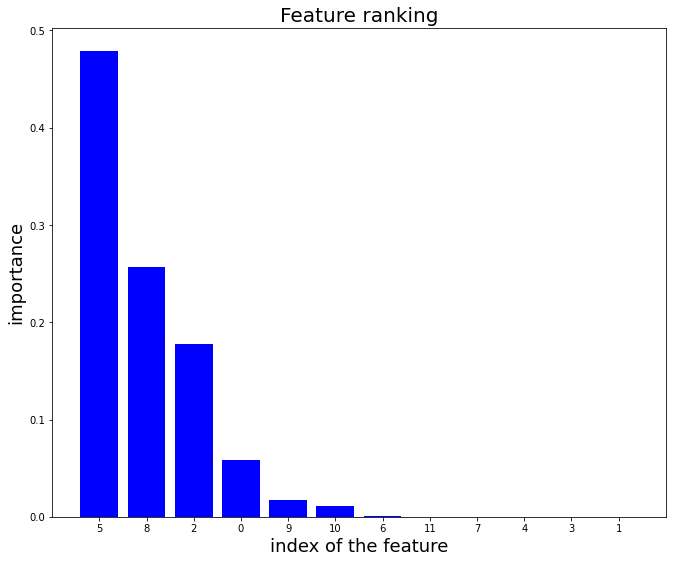

In [23]:
importances = modelo_tree.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(x.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

#Indice das features
#relationship = 1 
#capital-gain =2
# educational-num = 3
# age = 4
# capital-loss = 5

[0.04045753 0.         0.1768708  0.         0.         0.47858235
 0.         0.         0.25788419 0.0365137  0.00969143 0.        ]


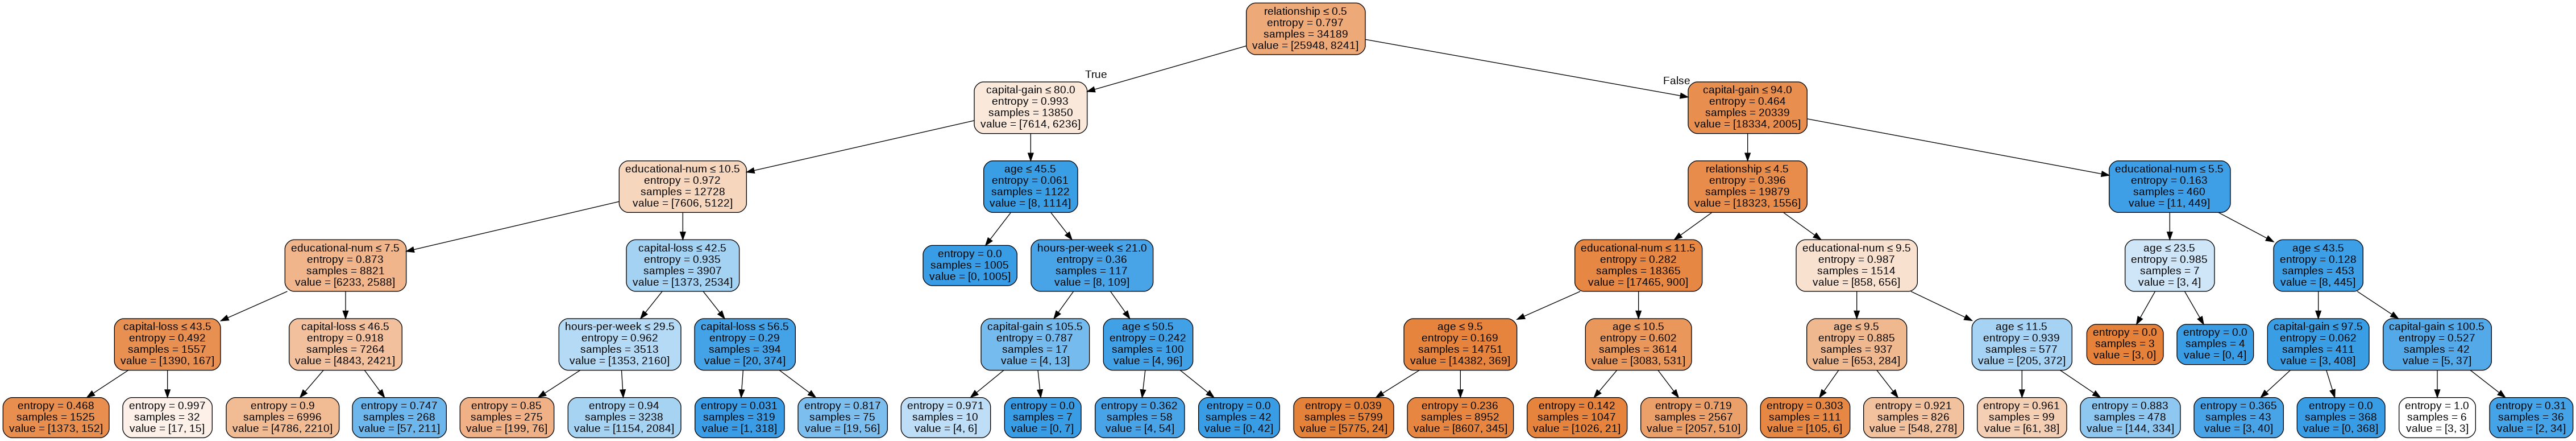

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image 
print (modelo_tree.feature_importances_)


nome_features = ['age', 'workclass', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
nome_classes = modelo_tree.classes_

# MONTAR A IMAGEM DA ÁRVORE
dot_data = StringIO()
#dot_data = tree.export_graphviz(my_tree_one, out_file=None, feature_names=featureNames)
export_graphviz(modelo_tree, out_file=dot_data, filled=True, feature_names=nome_features, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png')

Quanto menor for o entropy valor, mais importante  é essa feature

* Quais as features de maior importância para o modelo treinado

### Avalia o modelo com os dados de teste

In [24]:
modelo_tree.score(x_test, y_test)

0.8501330785504675

### Predizendo o Modelo


In [25]:
predicao_tree = modelo_tree.predict(x_test)
predicao_tree

array([0, 1, 0, ..., 1, 0, 0])

### Matriz de Confusão

In [26]:
matris_tree = pd.crosstab(y_test, predicao_tree, rownames=['Real'], colnames=['Predito'], margins=True)
matris_tree

Predito,0,1,All
Real,,,
0,10667,510,11177
1,1686,1790,3476
All,12353,2300,14653


### Relatório de Classificação

In [27]:
resultado_tree = classification_report(y_test, predicao_tree)
print(resultado_tree)

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     11177
           1       0.78      0.51      0.62      3476

    accuracy                           0.85     14653
   macro avg       0.82      0.73      0.76     14653
weighted avg       0.84      0.85      0.84     14653



Teve uma acurácia de 86%, porém o nível de acertos não foi muito bom, por que acertou mais em um do que em outro(95% para 0 e 55% para 1).

### Aplicando cros_validation para validação cruzadas dos dados
  * Esse Algorítmo busca eliminar  a aleatoriedade dos dados e melhorar a performance do modelo

In [28]:
# Criando uma função
cv = StratifiedKFold(n_splits = 47, shuffle = True)
def intervalo(results):
    mean = results.mean()
    data = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*data)*100, (mean + 2*data)*100))

    return intervalo


In [29]:
# aplicado cros_validation para validação cruzadas dos dados 
valid_tree = cross_val_score(modelo_tree,x_train,y_train, cv=cv, scoring= 'accuracy')


intervalo(valid_tree)

Acurácia média: 84.60%
Intervalo de acurácia: [82.13% ~ 87.07%]


<function __main__.intervalo>

### Matriz de confusão da validação cruzada

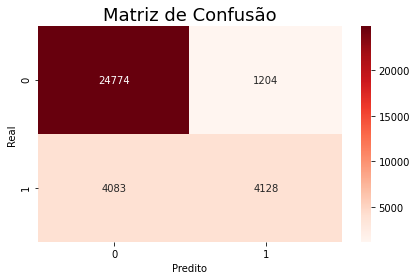

In [30]:
matriz_valid_predit = cross_val_predict(modelo_tree, x_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, matriz_valid_predit), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

 ### Relatório de Classificação da validação cruzada

In [31]:
resultado_valid_tree = classification_report(y_train, matriz_valid_predit)
print(resultado_valid_tree)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     25978
           1       0.77      0.50      0.61      8211

    accuracy                           0.85     34189
   macro avg       0.82      0.73      0.76     34189
weighted avg       0.84      0.85      0.83     34189



### Aplicando a biblioteca extratreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier


### Treinando o modelo

In [33]:
modelo_tree_extra = ExtraTreesClassifier()

In [34]:
modelo_tree_extra.fit(x_train, y_train, sample_weight=None)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

### Avaliando o modelo

In [36]:
modelo_tree_extra.score(x_test, y_test)

0.8478127345935986

 ### Predição do Modelo

In [35]:
predite_tree_extra = modelo_tree_extra.predict(x_test)


### Matriz de Confusão

In [37]:
 matris_tree_extra = pd.crosstab(y_test, predite_tree_extra, rownames=['Real'], colnames=['Predito'], margins=True)
matris_tree_extra

Predito,0,1,All
Real,,,
0,10284,893,11177
1,1337,2139,3476
All,11621,3032,14653


### Relatório de Classificação

In [38]:
resultado_tree_extra = classification_report(y_test, predite_tree_extra)
print(resultado_tree_extra)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11177
           1       0.71      0.62      0.66      3476

    accuracy                           0.85     14653
   macro avg       0.80      0.77      0.78     14653
weighted avg       0.84      0.85      0.84     14653



 ### Aplicando  validação cruzadas nos dados

In [ ]:
 valid_tree_extra = cross_val_score(modelo_tree_extra,x_train,y_train, cv=cv, scoring= 'accuracy')
 intervalo(valid_tree_extra)

Acurácia média: 84.43%
Intervalo de acurácia: [82.07% ~ 86.80%]


### Matriz de confusão da validação cruzada


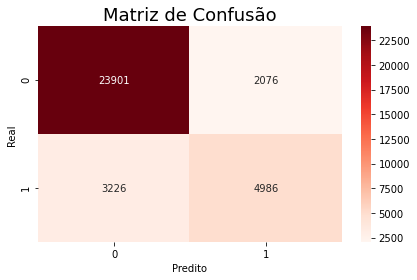

In [ ]:
matriz_pred_extra = cross_val_predict(modelo_tree_extra, x_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, matriz_pred_extra), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()


### Relatório de Classificação da validação cruzada


In [ ]:
resultado_valid_tree_extra = classification_report(y_train, matriz_pred_extra)
print(resultado_valid_tree_extra)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     25977
           1       0.71      0.61      0.65      8212

    accuracy                           0.84     34189
   macro avg       0.79      0.76      0.78     34189
weighted avg       0.84      0.84      0.84     34189



 ### Aplicando o Modelo Naive-Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB 

### Criando o Classificador

In [ ]:
# BernoulliNB é projetado para recursos binários / booleanos.
modelo_bayes = BernoulliNB()


### Treinando o modelo

In [ ]:
modelo_bayes.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### Avaliando o modelo com os dados de teste

In [ ]:
modelo_bayes.score(x_test, y_test)

0.7293387019722923

 ### Predição do Modelo

In [ ]:
predicao_naive = modelo_bayes.predict(x_test)

### Matriz de Confusão

In [ ]:
matris_bayes = pd.crosstab(y_test, predicao_naive, rownames=['Real'], colnames=['Predito'], margins=True)
matris_bayes

Predito,0,1,All
Real,,,
0,8107,3071,11178
1,895,2580,3475
All,9002,5651,14653


### Relatório de Classificação

In [ ]:
resultado_naive = classification_report(y_test, predicao_naive)
print(resultado_naive)

              precision    recall  f1-score   support

           0       0.90      0.73      0.80     11178
           1       0.46      0.74      0.57      3475

    accuracy                           0.73     14653
   macro avg       0.68      0.73      0.68     14653
weighted avg       0.80      0.73      0.75     14653



Aqui podemos verificar que este modelo  teve um recall de 73% para ambas as rendas, com uma acurácia de 73%, podemos dizer que o modelo está performando bem, porém sua precisão está enviesada, o modelo aprendeu mais sobre a classe que tinha uma maior quantidade de exemplos.

 ### Aplicando a validação cruzada

In [ ]:
valid_bayes = cross_val_score(modelo_bayes,x_train, y_train, cv=cv, scoring= 'accuracy')

intervalo(valid_bayes)

Acurácia média: 72.82%
Intervalo de acurácia: [70.11% ~ 75.54%]


### Matriz de confusão da validação cruzada

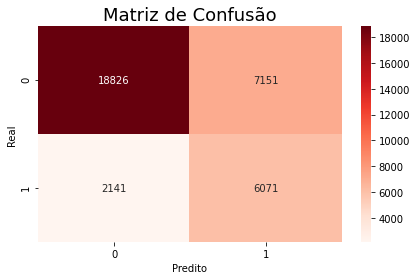

In [ ]:

matriz_pred_bayes = cross_val_predict(modelo_bayes, x_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, matriz_pred_bayes), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

### Relatório de Classificação da validação cruzada

In [ ]:
resultado_valid_bayes = classification_report(y_train, matriz_pred_bayes)
print(resultado_valid_bayes)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80     25977
           1       0.46      0.74      0.57      8212

    accuracy                           0.73     34189
   macro avg       0.68      0.73      0.68     34189
weighted avg       0.79      0.73      0.75     34189



### Aplicando o Modelo de KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### Definindo o número de vizinhos

In [ ]:

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Agora iremos aplicar nossos dados de treino ao algoritmo KNN

In [ ]:

modelo_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Avaliando o modelo com os dados de teste

In [ ]:
modelo_knn.score(x_test, y_test)


0.825769467003344

### Predição do modelo

In [ ]:
predicao_knn = modelo_knn.predict(x_test)
predicao_knn

array([0, 1, 0, ..., 0, 0, 0])

### Matriz de Confusão

In [ ]:
matris_knn = pd.crosstab(y_test, predicao_knn, rownames=['Real'], colnames=['Predito'], margins=True)
matris_knn

Predito,0,1,All
Real,,,
0,10045,1133,11178
1,1420,2055,3475
All,11465,3188,14653


### Relatório de Classificação

In [ ]:
resultado_knn = classification_report(y_test, predicao_knn)
print(resultado_knn)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11178
           1       0.64      0.59      0.62      3475

    accuracy                           0.83     14653
   macro avg       0.76      0.75      0.75     14653
weighted avg       0.82      0.83      0.82     14653



### Aplicando a Validação cruzada

In [ ]:
valid_knn = cross_val_score(modelo_knn,x_train, y_train, cv=cv, scoring= 'accuracy')

intervalo(valid_knn)

Acurácia média: 83.00%
Intervalo de acurácia: [79.92% ~ 86.07%]


### Matriz de confusão da validação cruzada

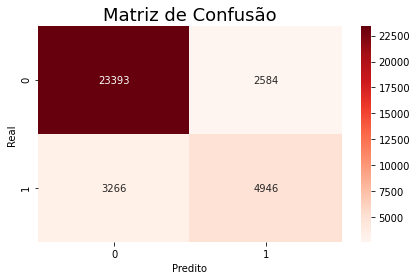

In [ ]:
matriz_pred_knn = cross_val_predict(modelo_knn, x_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, matriz_pred_knn), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

### Relatório de Classificação da validação cruzada

In [ ]:
resultado_valid_knn = classification_report(y_train, matriz_pred_knn)
print(resultado_valid_knn)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     25977
           1       0.66      0.60      0.63      8212

    accuracy                           0.83     34189
   macro avg       0.77      0.75      0.76     34189
weighted avg       0.82      0.83      0.83     34189



### Aplicando o Modelo SVM

In [41]:
from sklearn import svm

### Treinando o modelo

In [42]:
modelo_svm = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)


 ### Avaliando o modelo com os dados de teste

In [43]:
modelo_svm.score(x_test, y_test)

0.8095953047157579

###  Predição do modelo

In [ ]:
predicao_svm = modelo_svm.predict(x_test)
predicao_svm

array([0, 0, 0, ..., 0, 0, 0])

### Matriz de Confusão

In [ ]:
matris_svm = pd.crosstab(y_test, predicao_svm, rownames=['Real'], colnames=['Predito'], margins=True)
matris_svm

Predito,0,1,All
Real,,,
0,10829,349,11178
1,2442,1033,3475
All,13271,1382,14653


### Relatório de Classificação

In [ ]:
resultado_svm = classification_report(y_test, predicao_svm)
print(resultado_svm)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     11178
           1       0.75      0.30      0.43      3475

    accuracy                           0.81     14653
   macro avg       0.78      0.63      0.66     14653
weighted avg       0.80      0.81      0.78     14653



### Aplicando validação cruzada

In [ ]:
valid_svm = cross_val_score(modelo_svm,x_train, y_train, cv=cv, scoring= 'accuracy')

intervalo(valid_svm)

### Matriz de confusão da validação cruzada

In [ ]:

matriz_pred_svm = cross_val_predict(modelo_svm, x_train, y_train, cv = cv)


fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, matriz_pred_svm), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()


### Relatório de Classificação da validação cruzada

In [ ]:
resultado_valid_svm = classification_report(y_train, matriz_pred_svm)
print(resultado_valid_svm)


### Aplicando o Modelo de Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
modelo_pred = LogisticRegression()
modelo_pred

### Treinando o algoritmo

In [ ]:
modelo_pred.fit(x_train, y_train)

### Avaliando o modelo com os dados de teste

In [ ]:
modelo_pred.score(x_test, y_test)

### Predição do Modelo

In [ ]:
predicao_logic = modelo_pred.predict(x_test)

### Matriz de Confusão

In [ ]:
 matris_logist = pd.crosstab(y_test, predicao_logic, rownames=['Real'], colnames=['Predito'], margins=True)
matris_logist

### Relatório de Classificação

In [ ]:
resultado_logist = classification_report(y_test, predicao_logic)
print(resultado_logist)

### Aplicando a validação cruzada

In [ ]:
valid_pred = cross_val_score(modelo_pred,x_train, y_train, cv=cv, scoring= 'accuracy')

intervalo(valid_pred)

### Matriz de confusão da validação cruzada

In [ ]:
matriz_pred_logist = cross_val_predict(modelo_pred, x_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, matriz_pred_logist), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

### Relatório de Classificação da validação cruzada

In [ ]:
resultado_valid_logist = classification_report(y_train, matriz_pred_logist)
print(resultado_valid_logist)

In [ ]:
print('\n','KNN', resultado_knn, '\n','R.logística','\n', resultado_logist)
print('\n','Naive', resultado_naive, '\n','SVM','\n', resultado_svm)
print('\n','Árvore de Decisão','\n', resultado_tree)

* ## Pré-Ánalise
   Apesar do modelos terem uma acurácia boa não conseguiram ter uma boa performance no nível de acerto, acabou 
   pesando mais para um lado do que para o outro, ou seja, acertou mais quem ganhamava menos ou igual a 50k do que quem ganhava mais do que 50k. Isso pode ser devido ao fato de termos muito mais dados relacionados a pessoas que tem uma renda menor ou igual à 50k, por isso os modelos acertaram mais quem tem a renda abaixo de 50k.
 
 * Vou igualar a quantidade de amostras entre as classes para resolver este problema. Vamos usar o método Undersampling

### Instância o NearMiss

In [44]:
near  = NearMiss()

### Aplicando o NearMiss

In [ ]:
x, y = near.fit_sample(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Checar a quantidade de amostras entre as classes

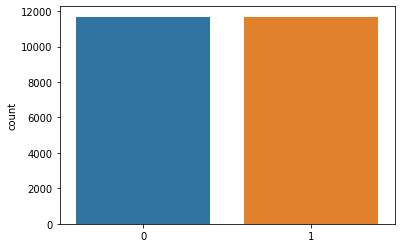

In [ ]:
amostras = sns.countplot(x=y)

### Fazer o retreinamento dos modelos, porém vou escolher um dos modelos para aplicar a performance.

## Árvore de decisão

### Separando os dados em 70% para treino e 30% para teste

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.3, random_state = 1, stratify=y)


### Instância o classificador

In [ ]:
modelo_Extra_tree = ExtraTreesClassifier()

### Treinando o Algoritmo

In [ ]:
modelo_Extra_tree.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

### Aplicando a validação cruzada

In [ ]:
# Criando uma função
cv = StratifiedKFold(n_splits = 47, shuffle = True)
def intervalo(results):
    mean = results.mean()
    std = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*std)*100, (mean + 2*std)*100))

    return intervalo


In [ ]:
validacao_extra = cross_val_score(modelo_Extra_tree,x_train,y_train, cv=cv, scoring= 'accuracy')
intervalo(validacao_extra)


Acurácia média: 75.84%
Intervalo de acurácia: [70.72% ~ 80.96%]


<function __main__.intervalo>

 ### Matriz de confusão da validação cruzada

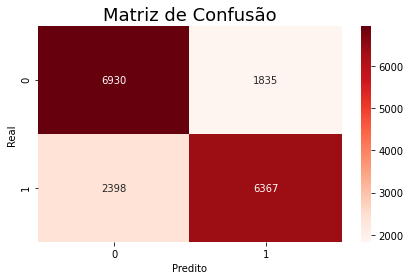

In [ ]:
matriz_extra = cross_val_predict(modelo_Extra_tree, x_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, matriz_extra), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()


 O Número de acertos para ambas as classes é praticamente quase o mesmo

### Relatório de Classificação da validação cruzada

In [ ]:
resultado_validacao = classification_report(y_train, matriz_extra)
print(resultado_validacao)

              precision    recall  f1-score   support

           0       0.74      0.79      0.77      8765
           1       0.78      0.73      0.75      8765

    accuracy                           0.76     17530
   macro avg       0.76      0.76      0.76     17530
weighted avg       0.76      0.76      0.76     17530



O recall da classe 1 melhorou significativamente, pois temos a mesma quantidade de exemplos para ambas as classes, ou seja, nosso modelo não está mais enviesado

 ### Modificando os hyperparâmetros do meu modelo para que ele funcione em um nível ideal e obtenha nosso nível desejável de desempenho, espero poder chegar em uma acurácia de 85%

 ### Bayes Search

In [ ]:
# avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 pip install "scikit_optimize==0.8.1"

     |████████████████████████████████| 102kB 2.2MB/s ta 0:00:011


In [ ]:
# importando a biblioteca
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
bayes_hiper = BayesSearchCV(estimator = ExtraTreesClassifier(random_state=42), search_spaces= {'max_depth':Integer(1,200), 
    'min_samples_leaf':Integer(1,100)}, scoring='roc_auc', cv = 3,
         n_iter= 50, random_state=42)

In [ ]:
bayes = bayes_hiper.fit(x_train, y_train)
bayes

BayesSearchCV(cv=3, error_score='raise',
              estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                             class_weight=None,
                                             criterion='gini', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=N...
              fit_params=None, iid=True, n_iter=50, n_jobs=1, n_points=1,
              optimizer_kwargs=None, pre_dispat

In [ ]:
print('Melhor comprimento máximo da árvore: {}'.format(bayes_hiper.best_params_['max_depth']))
print('Melhor comprimento mínimo da árvore: {}'.format(bayes_hiper.best_params_['min_samples_leaf']))
print('Desempenho do melhor modelo: {}'.format(round(bayes_hiper.best_score_,5)))
print('Tempo para realizar a Otimização:') 
%timeit -n 1 -r 1 bayes

Melhor comprimento máximo da árvore: 200
Melhor comprimento mínimo da árvore: 3
Desempenho do melhor modelo: 0.88055
Tempo para realizar a Otimização:
1 loop, best of 1: 761 ns per loop


### Quais aplicações de negócio podem ser desenvolvidas com o estudo?

### Qual seria o efeito na performance do seu modelo se retirasse a informação que você considera mais complexa de ser realizada ou se retirasse informações sensíveis?

R. Eu exclui da base algumas features que eram consideradas importantes para o aprendizado do modelo e impactou na performance do meu modelo, a performance acabou caindo em 4% de acúracia e o nível de acertos de uma classe para outra acabaram ficando diferentes( uma acertando mais do que a outra) 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import matplotlib.image as mpim
import scipy.stats as st
from scipy import stats
from statsmodels.formula.api  import ols
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
# Essa biblioteca mistura os dados e garante que todos tenham informação
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing 
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
renda = pd.read_csv('adult.csv', delimiter=',')
renda = renda.drop(['education', 'fnlwgt', 'relationship', 'age', 'capital-gain' ], axis=1)

In [ ]:
# importando a biblioteca encoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
renda = renda.apply(LabelEncoder().fit_transform)
renda.tail()

,workclass,educational-num,marital-status,occupation,race,gender,capital-loss,hours-per-week,native-country,income
48837,4,11,2,13,4,0,0,37,39,0
48838,4,8,2,7,4,1,0,39,39,1
48839,4,8,6,1,4,0,0,39,39,0
48840,4,8,4,1,4,1,0,19,39,0
48841,5,8,2,4,4,0,0,39,39,1


In [ ]:
# Separando as variaveis preditoras e a variavel alvo
y = renda['income']
x = renda.drop('income', axis=1)


In [ ]:
x.head()

,workclass,educational-num,marital-status,occupation,race,gender,capital-loss,hours-per-week,native-country
0,4,6,4,7,2,1,0,39,39
1,4,8,2,5,4,1,0,49,39
2,2,11,2,11,4,1,0,39,39
3,4,9,2,7,2,1,0,39,39
4,0,9,4,0,4,0,0,29,39


Igualando as classes

In [ ]:
near  = NearMiss()

In [ ]:
x, y = near.fit_sample(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


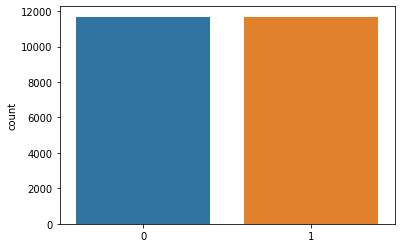

In [ ]:
amostras = sns.countplot(x=y)

In [ ]:
# importando a biblioteca de treino e teste
from sklearn.model_selection import train_test_split

In [ ]:

# aplicando a biblioteca de treino
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.3, random_state = 1, stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [ ]:
modelo_tree_v1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)


In [ ]:
modelo_tree_v1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
modelo_tree_v1.feature_importances_

array([0.        , 0.33129801, 0.32962409, 0.00677184, 0.02043059,
       0.        , 0.16659906, 0.13053162, 0.01474478])

### PODEMOS MOSTRAR AS FEATURES MAIS IMPORTANTE

In [ ]:
for feature,importancia in zip(renda.columns, modelo_tree_v1.feature_importances_):
    print("{}:{}".format(feature, importancia))
# Saída

workclass:0.0
educational-num:0.33129801406181314
marital-status:0.3296240924403038
occupation:0.006771843993417926
race:0.020430587998659495
gender:0.0
capital-loss:0.1665990571450243
hours-per-week:0.13053162499915677
native-country:0.014744779361624593


Feature ranking:
1. feature 1 (0.331298)
2. feature 2 (0.329624)
3. feature 6 (0.166599)
4. feature 7 (0.130532)
5. feature 4 (0.020431)
6. feature 8 (0.014745)
7. feature 3 (0.006772)
8. feature 5 (0.000000)
9. feature 0 (0.000000)


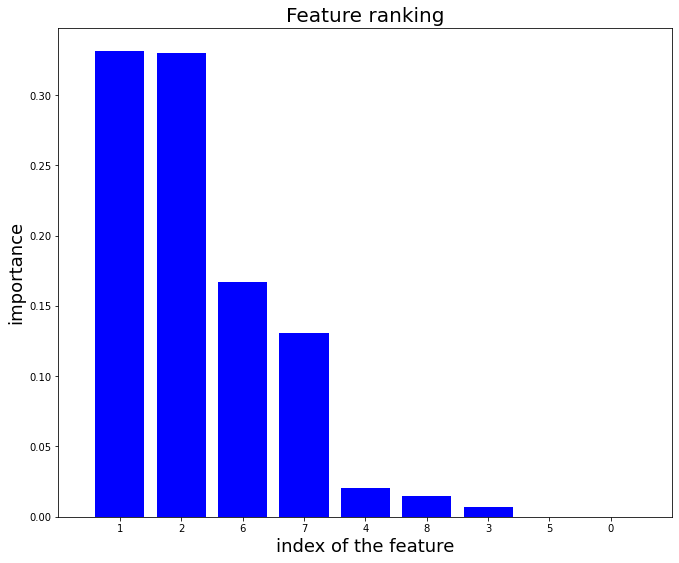

In [ ]:
importances = modelo_tree_v1.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(x.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

In [ ]:
# Criando uma função
cv = StratifiedKFold(n_splits = 47, shuffle = True)
def intervalo(results):
    mean = results.mean()
    data = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*data)*100, (mean + 2*data)*100))

    return intervalo

In [ ]:
# aplicado cros_validation para validação cruzadas dos dados 
valid_tree_v1 = cross_val_score(modelo_tree_v1,x_train,y_train, cv=cv, scoring= 'accuracy')

intervalo(valid_tree_v1)

Acurácia média: 70.81%
Intervalo de acurácia: [65.94% ~ 75.68%]


<function __main__.intervalo>

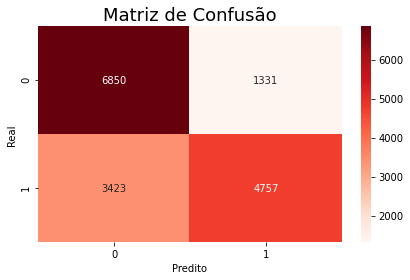

In [ ]:
matriz_valid_predit_v1 = cross_val_predict(modelo_tree_v1, x_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, matriz_valid_predit_v1), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

In [ ]:
resultado_valid_tree_v1 = classification_report(y_train, matriz_valid_predit_v1)
print(resultado_valid_tree_v1)

              precision    recall  f1-score   support

           0       0.67      0.84      0.74      8181
           1       0.78      0.58      0.67      8180

    accuracy                           0.71     16361
   macro avg       0.72      0.71      0.70     16361
weighted avg       0.72      0.71      0.70     16361



### Aplicando a biblioteca extratreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


### Treinando o modelo

In [ ]:
modelo_tree_extra = ExtraTreesClassifier()

In [ ]:
modelo_tree_extra.fit(x_train, y_train, sample_weight=None)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
# aplicado cros_validation para validação cruzadas dos dados 
valid_tree_v2 = cross_val_score(modelo_tree_extra,x_train,y_train, cv=cv, scoring= 'accuracy')

intervalo(valid_tree_v2)

Acurácia média: 74.34%
Intervalo de acurácia: [70.30% ~ 78.38%]


<function __main__.intervalo>

#### Matriz de confusão

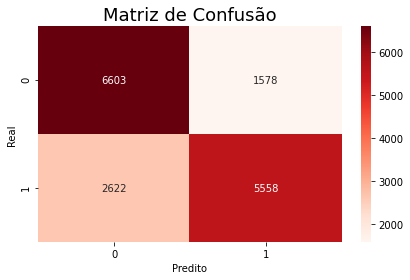

In [ ]:
matriz_valid_predit_v2 = cross_val_predict(modelo_tree_extra, x_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, matriz_valid_predit_v2), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

In [ ]:
resultado_valid_tree_v2 = classification_report(y_train, matriz_valid_predit_v2)
print(resultado_valid_tree_v2)

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      8181
           1       0.78      0.68      0.73      8180

    accuracy                           0.74     16361
   macro avg       0.75      0.74      0.74     16361
weighted avg       0.75      0.74      0.74     16361



 ### Bayes Search

In [ ]:
# avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 pip install "scikit_optimize==0.8.1"

     |████████████████████████████████| 102kB 2.6MB/s ta 0:00:011


In [ ]:
# importando a biblioteca
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
bayes_hiper = BayesSearchCV(estimator = ExtraTreesClassifier(random_state=42), search_spaces= {'max_depth':Integer(1,200), 
    'min_samples_leaf':Integer(1,100)}, scoring='roc_auc', cv = 3,
         n_iter= 50, random_state=42)

In [ ]:
bayes = bayes_hiper.fit(x_train, y_train)
bayes

BayesSearchCV(cv=3, error_score='raise',
              estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                             class_weight=None,
                                             criterion='gini', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=N...
              fit_params=None, iid=True, n_iter=50, n_jobs=1, n_points=1,
              optimizer_kwargs=None, pre_dispat

In [ ]:
print('Melhor comprimento máximo da árvore: {}'.format(bayes_hiper.best_params_['max_depth']))
print('Melhor comprimento mínimo da árvore: {}'.format(bayes_hiper.best_params_['min_samples_leaf']))
print('Desempenho do melhor modelo: {}'.format(round(bayes_hiper.best_score_,5)))
print('Tempo para realizar a Otimização:') 
%timeit -n 1 -r 1 bayes

Melhor comprimento máximo da árvore: 200
Melhor comprimento mínimo da árvore: 3
Desempenho do melhor modelo: 0.83913
Tempo para realizar a Otimização:
1 loop, best of 1: 748 ns per loop
